In [1]:
!pip install yfinance pandas statsmodels matplotlib
!pip install prophet

#python.exe -m pip install --upgrade pip


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


<Axes: xlabel='Date'>

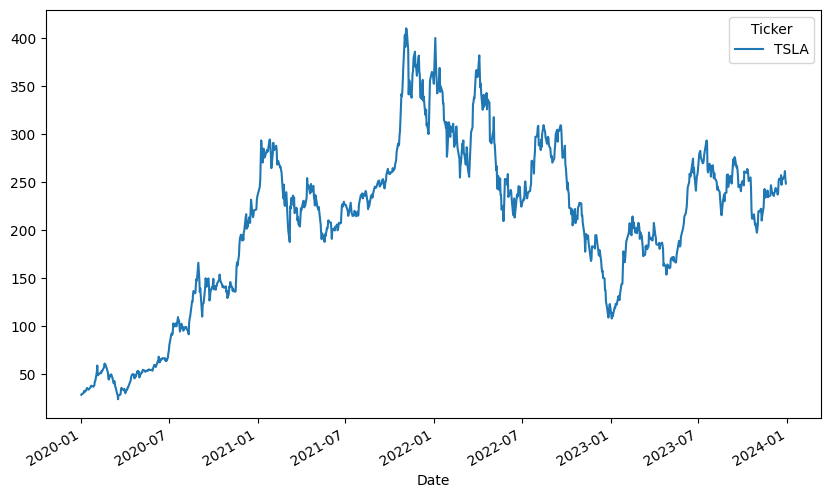

In [2]:
import yfinance as yf
import pandas as pd

# Fetch stock data for Tesla (example)
ticker = 'TSLA'
stock_data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Show the first few rows of data
print(stock_data.head())
stock_data['Close'] = stock_data['Close'].ffill() # Focus on the 'Close' price for forecasting
# Plot the closing price
stock_data['Close'].plot(figsize=(10, 6))

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

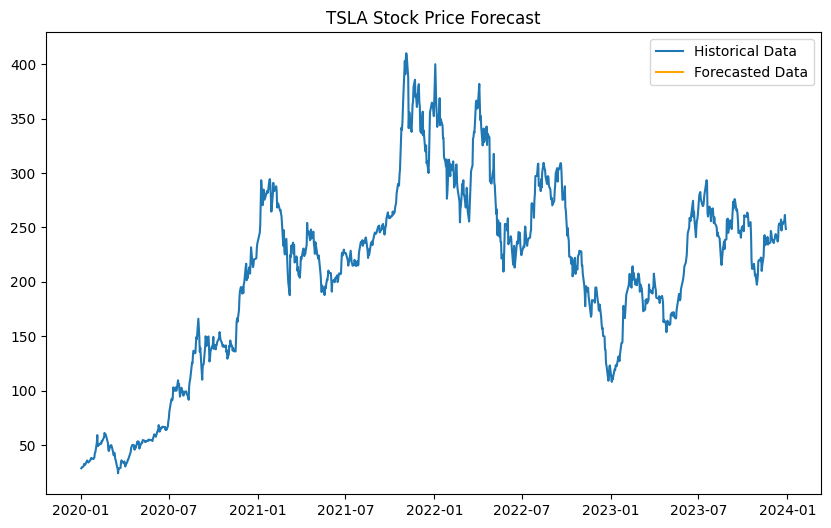

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (p, d, q) parameters (start with (5, 1, 0) as an example)
model = ARIMA(stock_data['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create a new DataFrame for the forecasted values
forecast_index = pd.date_range(start=stock_data.index[-1], periods=31, freq='B')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(forecast_df, label='Forecasted Data', color='orange')
plt.legend(loc='best')
plt.title(f"{ticker} Stock Price Forecast")
plt.show()


[*********************100%***********************]  1 of 1 completed
18:49:56 - cmdstanpy - INFO - Chain [1] start processing
18:49:56 - cmdstanpy - INFO - Chain [1] done processing


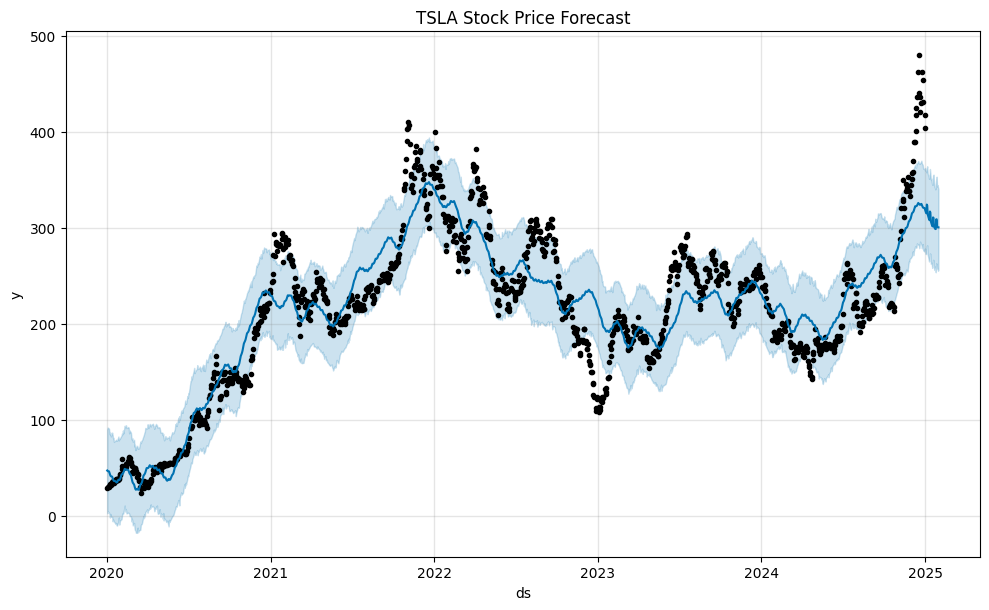

In [5]:
# Import required libraries
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data for Tesla (TSLA)
ticker = 'TSLA'
stock_data = yf.download(ticker, start='2020-01-01', end='2025-01-01', multi_level_index=False)

# Prepare data for Prophet (rename columns)
stock_data = stock_data[['Close']].reset_index()
stock_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(stock_data)

future = model.make_future_dataframe(periods=30) # Make a forecast for the next 30 days
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title(f"{ticker} Stock Price Forecast")
plt.show()

# model.fit(stock_data) analyzes the historical data (dates in 'ds' and closing prices in 'y') to estimate these components.
#future = model.make_future_dataframe(periods=30) creates a DataFrame with dates from January 1, 2020, to January 31, 2024 (historical dates plus 30 future days).
#forecast = model.predict(future) predicts the stock price ('yhat') for all these dates, including trends and uncertainties.

In [ ]:
# The Forecast Plot Explained
# When you run model.plot(forecast), Prophet generates a graph with several elements. Here’s what you’ll see and what each part means:

# 1. Black Dots: Historical Data
# These are the actual closing prices of Tesla stock from January 1, 2020, to January 1, 2025 (your input data).
# Each dot corresponds to a date ('ds') and its closing price ('y').
# This shows the raw data Prophet used to learn the trend and seasonality.
# 2. Blue Line: Forecasted Trend (yhat)
# This solid blue line represents the predicted stock price ('yhat') over the entire period—both historical (2020-2025) and future (January 2-31, 2024).
# For the historical part, it’s the model’s fit to the actual data, showing how well it captures the trend and seasonality.
# For the future part (the last 30 days), it’s the forecast, extending beyond January 1, 2024, based on the learned patterns.
# The line might curve up, down, or fluctuate, depending on the trend Prophet detects (e.g., Tesla’s growth or corrections).
# 3. Light Blue Shaded Area: Uncertainty Interval
# Around the blue line, there’s a light blue band representing the uncertainty of the forecast (typically 80% confidence interval, stored in 'yhat_lower' and 'yhat_upper' columns of the forecast DataFrame).
# For historical dates, this shows where the model thinks the true price could have been, given noise.
# For future dates, it widens as uncertainty grows, indicating the range within which the stock price is likely to fall (e.g., if the forecast is $300, the band might span $280-$320).
# Wider bands mean less confidence, often due to volatility in Tesla’s stock or limited data.
# 4. Time Axis (X-Axis)
# The x-axis shows dates from January 2020 to January 2024 (historical) and extends to late January 2024 (forecast).
# You’ll see yearly markers (e.g., 2020, 2021), reflecting the four-year span plus the 30-day forecast.
# 5. Price Axis (Y-Axis)
# The y-axis shows the stock price in dollars, scaled to fit Tesla’s historical closing prices (e.g., ranging from $50 to $400, depending on splits and growth).
# The scale adjusts automatically to the data’s range.
# 6. Title
# Your addition of plt.title(f"{ticker} Stock Price Forecast") labels the graph "TSLA Stock Price Forecast," making it clear it’s Tesla’s stock prediction.

In [7]:
# I below code show the predictive trend upcoming months
# Let’s create some real-time, useful code using the Tesla stock data you’ve been working with. 
# Since it’s April 1, 2025, I’ll design a practical script that fetches the latest available data (up to today), 
# forecasts the next 30 days (April 2 to May 1, 2025), and provides actionable insights like potential buy/sell signals based on the forecast. 
# I’ll also include a comparison of the forecast trend to the recent trend and visualize it, making it more relevant for real-time use

[*********************100%***********************]  1 of 1 completed


12:07:15 - cmdstanpy - INFO - Chain [1] start processing
12:07:16 - cmdstanpy - INFO - Chain [1] done processing


Latest Price (April 1, 2025): $282.76
Forecasted Price (May 1, 2025): $252.45 (Range: $209.91 - $299.75)
Recent Trend (Last 30 Days): $-2.39/day
Forecast Trend (Next 30 Days): $-0.65/day
Signal: Hold


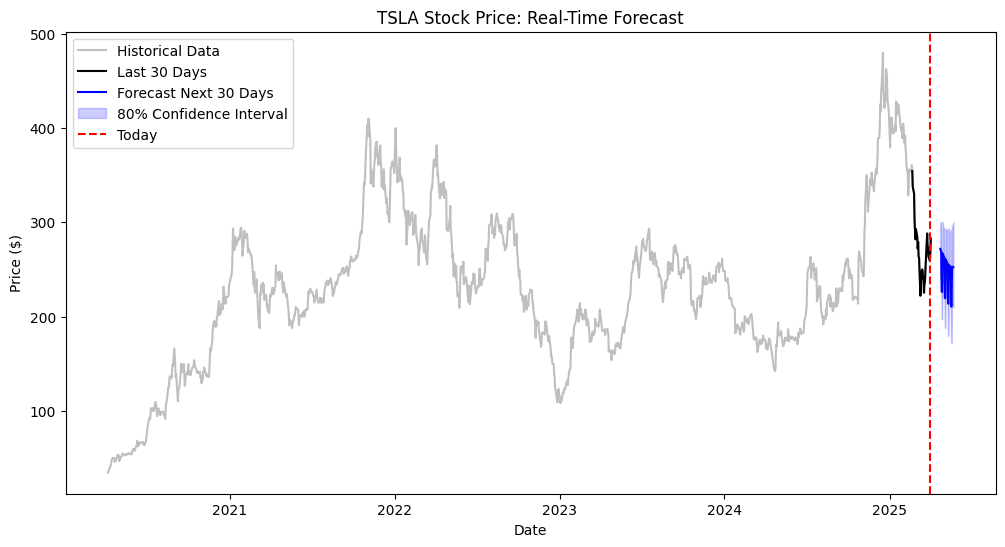


Detailed Forecast for Next 30 Days:
             ds    yhat  yhat_lower  yhat_upper
1275 2025-04-23  271.85      242.99      299.75
1276 2025-04-24  270.08      240.00      299.97
1277 2025-04-25  269.59      242.10      298.45
1278 2025-04-26  226.95      197.25      256.24
1279 2025-04-27  225.97      197.12      255.90
1280 2025-04-28  267.14      237.19      300.66
1281 2025-04-29  266.01      238.27      296.01
1282 2025-04-30  264.97      233.30      294.19
1283 2025-05-01  263.32      232.90      294.29
1284 2025-05-02  262.92      232.42      293.13
1285 2025-05-03  220.36      189.47      252.81
1286 2025-05-04  219.44      187.70      251.45
1287 2025-05-05  260.67      229.35      292.54
1288 2025-05-06  259.58      229.28      292.03
1289 2025-05-07  258.60      225.24      292.98
1290 2025-05-08  257.02      223.86      290.23
1291 2025-05-09  256.73      223.13      292.21
1292 2025-05-10  214.30      179.12      249.03
1293 2025-05-11  213.56      180.62      248.66
129

In [19]:
# Import required libraries
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Fetch real-time stock data for Tesla (TSLA) up to today
ticker = 'TSLA'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today: 2025-04-01
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')  # 5 years back
stock_data = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)

# Prepare data for Prophet
stock_data = stock_data[['Close']].reset_index()
stock_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize and fit the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.5,  # More flexible to trend changes
    weekly_seasonality=True,      # Capture weekly patterns
    yearly_seasonality=True       # Capture yearly patterns
)
model.fit(stock_data)

# Forecast the next 30 days (April 2 - May 1, 2025)
future = model.make_future_dataframe(periods=50) 
forecast = model.predict(future)

# Extract recent trend (last 30 days) and forecast trend (next 30 days)
recent_data = stock_data.tail(30)  # Last 30 days up to April 1, 2025
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)  # Next 30 days

# Calculate trend slopes (simple linear approximation)
recent_trend = (recent_data['y'].iloc[-1] - recent_data['y'].iloc[0]) / 30  # $/day
forecast_trend = (forecast_data['yhat'].iloc[-1] - forecast_data['yhat'].iloc[0]) / 30  # $/day

# Simple buy/sell signal based on trend shift and confidence
latest_price = recent_data['y'].iloc[-1]
forecast_end_price = forecast_data['yhat'].iloc[-1]
forecast_lower = forecast_data['yhat_lower'].iloc[-1]
forecast_upper = forecast_data['yhat_upper'].iloc[-1]

signal = "Hold"
if forecast_end_price > latest_price and forecast_lower > latest_price:
    signal = "Buy"  # Forecast confidently above current price
elif forecast_end_price < latest_price and forecast_upper < latest_price:
    signal = "Sell"  # Forecast confidently below current price

# Print actionable insights
print(f"Latest Price (April 1, 2025): ${latest_price:.2f}")
print(f"Forecasted Price (May 1, 2025): ${forecast_end_price:.2f} "
      f"(Range: ${forecast_lower:.2f} - ${forecast_upper:.2f})")
print(f"Recent Trend (Last 30 Days): ${recent_trend:.2f}/day")
print(f"Forecast Trend (Next 30 Days): ${forecast_trend:.2f}/day")
print(f"Signal: {signal}")

# Plot historical data, recent trend, and forecast
plt.figure(figsize=(12, 6))
plt.plot(stock_data['ds'], stock_data['y'], label='Historical Data', color='gray', alpha=0.5)
plt.plot(recent_data['ds'], recent_data['y'], label='Last 30 Days', color='black')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecast Next 30 Days', color='blue')
plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                 color='blue', alpha=0.2, label='80% Confidence Interval')
plt.axvline(x=datetime(2025, 4, 1), color='red', linestyle='--', label='Today')
plt.title(f"{ticker} Stock Price: Real-Time Forecast")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Optional: Detailed forecast table
print("\nDetailed Forecast for Next 30 Days:")
print(forecast_data.round(2))

In [20]:
# Define key levels
support_level = stock_data['y'].rolling(window=20).min().iloc[-1]  # 20-day support
resistance_level = stock_data['y'].rolling(window=20).max().iloc[-1]  # 20-day resistance

# Calculate Risk and Reward
risk = latest_price - support_level
reward = resistance_level - latest_price

# Avoid division by zero
if risk > 0:
    rrr = reward / risk
else:
    rrr = float('inf')  # If no risk, assume high reward

# Determine trade quality
if rrr > 2:
    trade_signal = "Favorable Trade  (High Reward, Low Risk)"
elif 1 <= rrr <= 2:
    trade_signal = "Moderate Trade  (Balanced Risk-Reward)"
else:
    trade_signal = "Unfavorable Trade  (High Risk, Low Reward)"

print(f"Support Level: ${support_level:.2f}, Resistance Level: ${resistance_level:.2f}")
print(f"Risk: ${risk:.2f}, Reward: ${reward:.2f}")
print(f"Risk-Reward Ratio (RRR): {rrr:.2f} → {trade_signal}")


Support Level: $222.15, Resistance Level: $288.14
Risk: $60.61, Reward: $5.38
Risk-Reward Ratio (RRR): 0.09 → Unfavorable Trade  (High Risk, Low Reward)


In [ ]:
# Calculate daily returns and volatility
stock_data['returns'] = stock_data['y'].pct_change()  # Percentage change
volatility = stock_data['returns'].std() * 100  # Convert to percentage

print(f"Historical Volatility: {volatility:.2f}% (based on last 5 years)")

#If volatility is high, the stock might be risky for short-term trades


Historical Volatility: 4.01% (based on last 5 years)


In [18]:
# Calculate Moving Averages
stock_data['SMA_20'] = stock_data['y'].rolling(window=20).mean()  # Short-term trend
stock_data['SMA_50'] = stock_data['y'].rolling(window=50).mean()  # Long-term trend

# Determine crossover signals
latest_sma_20 = stock_data['SMA_20'].iloc[-1]
latest_sma_50 = stock_data['SMA_50'].iloc[-1]

if latest_sma_20 > latest_sma_50:
    ma_signal = "Bullish (Uptrend) - Buy Signal "
else:
    ma_signal = "Bearish (Downtrend) - Sell Signal "

print(f"Moving Average Crossover: {ma_signal}")

#If the short-term moving average crosses above the long-term, it’s a buy signal.

#If the short-term falls below, it’s a sell signal.

Moving Average Crossover: Bearish (Downtrend) - Sell Signal 


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


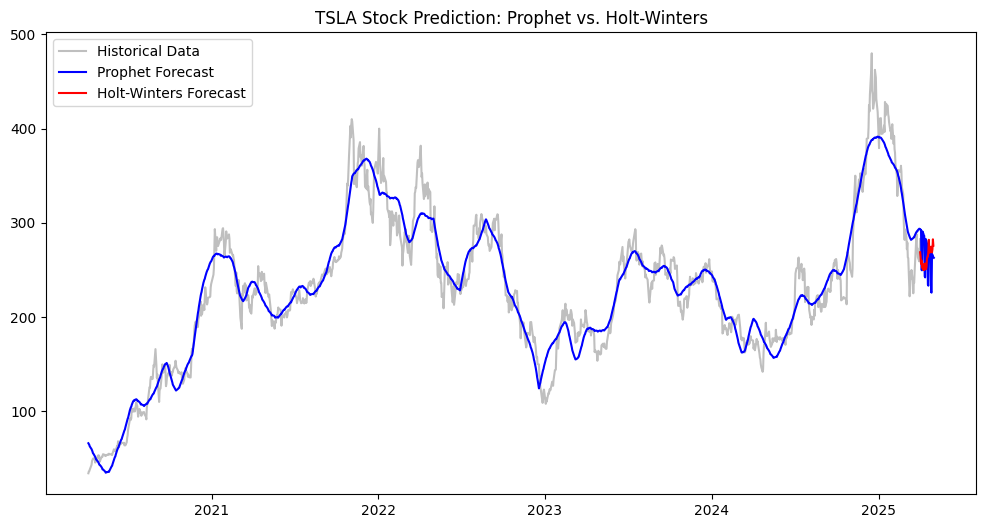

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt-Winters (Triple Exponential Smoothing)
holt_model = ExponentialSmoothing(stock_data['y'], trend='add', seasonal='add', seasonal_periods=365)
holt_fit = holt_model.fit()

# Forecast next 30 days
holt_forecast = holt_fit.forecast(30)

# Plot Holt-Winters vs. Prophet
plt.figure(figsize=(12,6))
plt.plot(stock_data['ds'], stock_data['y'], label="Historical Data", color='gray', alpha=0.5)
plt.plot(forecast['ds'], forecast['yhat'], label="Prophet Forecast", color='blue')
plt.plot(pd.date_range(start=stock_data['ds'].iloc[-1], periods=30, freq='D'), holt_forecast, label="Holt-Winters Forecast", color='red')
plt.title("TSLA Stock Prediction: Prophet vs. Holt-Winters")
plt.legend()
plt.show()

#An alternative to Prophet using time-series smoothing.
# Useful when Prophet isn't performing well.

#Compare Prophet’s forecast to Holt-Winters.
# If Holt-Winters is smoother, use it for stable trends.
# If Prophet reacts faster, use it for volatile stocks

In [10]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(35))

             ds        yhat  yhat_lower  yhat_upper
1227 2025-02-20  334.705239  306.830626  362.386910
1228 2025-02-21  332.324404  305.965753  357.434876
1229 2025-02-24  323.671295  296.482056  350.840188
1230 2025-02-25  320.264497  292.892292  344.262348
1231 2025-02-26  316.819550  288.589812  344.917905
1232 2025-02-27  312.703444  286.463936  339.345782
1233 2025-02-28  309.984852  284.440504  336.211995
1234 2025-03-03  301.581393  274.850823  327.010942
1235 2025-03-04  298.697926  273.147494  325.175057
1236 2025-03-05  295.994782  269.510104  321.843545
1237 2025-03-06  292.831190  265.267120  318.055665
1238 2025-03-07  291.263640  265.151894  315.929617
1239 2025-03-10  287.321941  259.291476  314.355294
1240 2025-03-11  286.183625  259.620907  314.416784
1241 2025-03-12  285.308464  258.952609  310.279031
1242 2025-03-13  284.025101  259.288110  309.749651
1243 2025-03-14  284.358420  259.766223  310.707577
1244 2025-03-17  285.926588  262.474690  311.780849
1245 2025-03

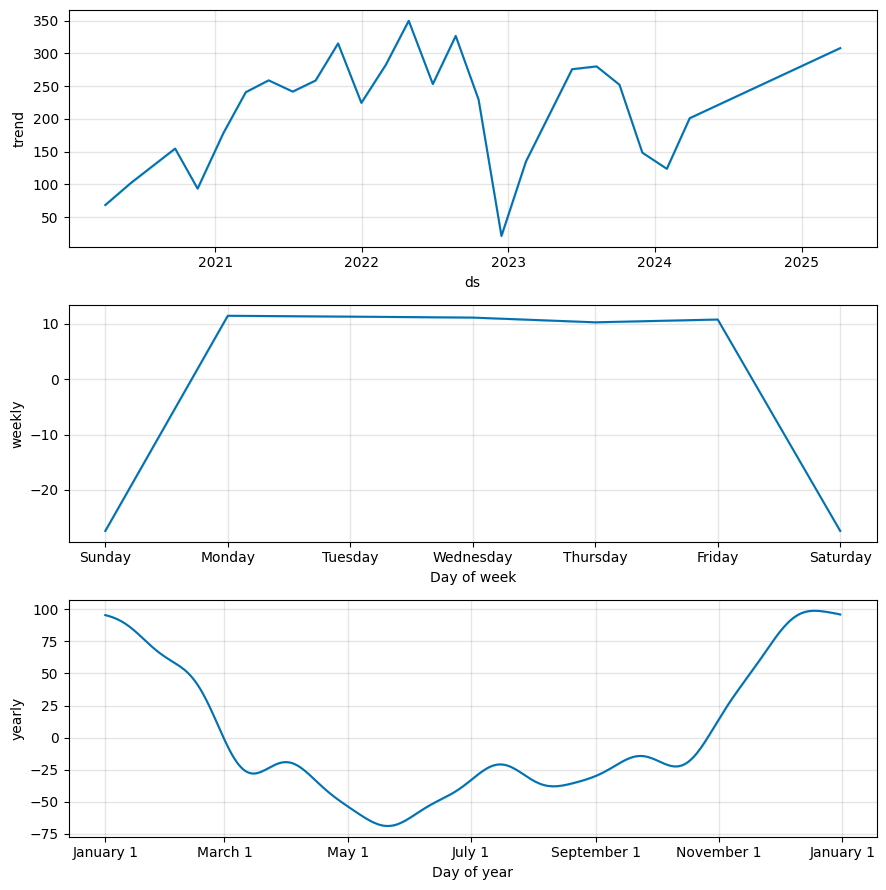

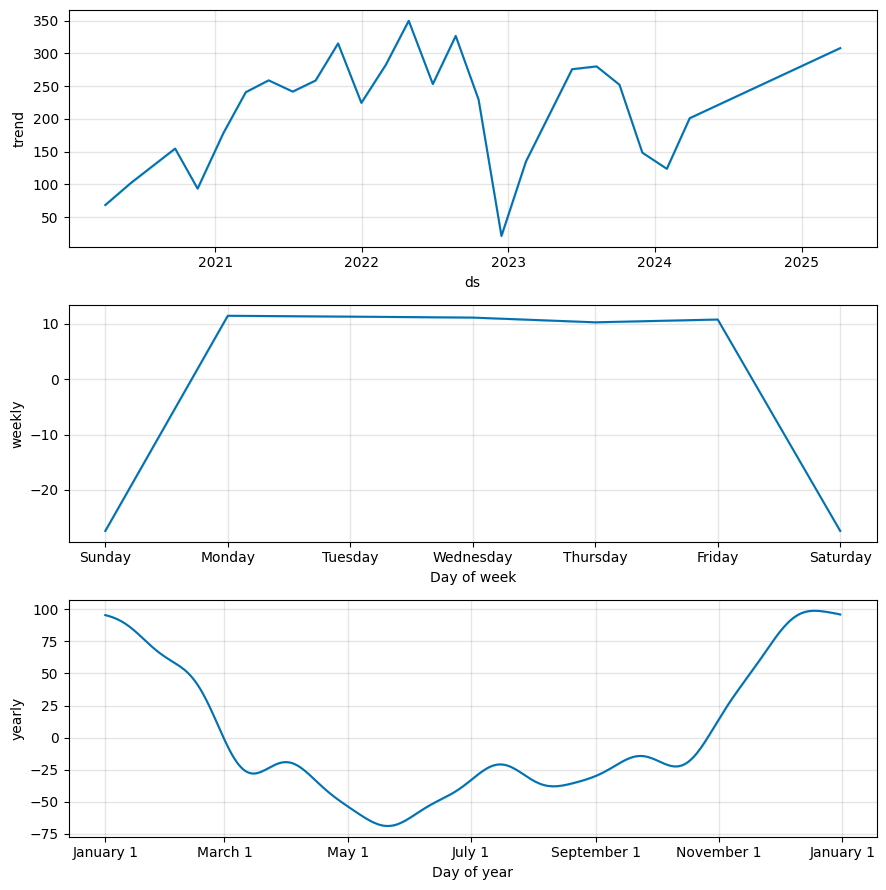

In [11]:
model.plot_components(forecast)

In [12]:
actual_data = yf.download('TSLA', start='2024-01-01', end='2025-04-01', multi_level_index=False)
print(actual_data['Close'].head(30))  # January 2024 prices

[*********************100%***********************]  1 of 1 completed

Date
2024-01-02    248.419998
2024-01-03    238.449997
2024-01-04    237.929993
2024-01-05    237.490005
2024-01-08    240.449997
2024-01-09    234.960007
2024-01-10    233.940002
2024-01-11    227.220001
2024-01-12    218.889999
2024-01-16    219.910004
2024-01-17    215.550003
2024-01-18    211.880005
2024-01-19    212.190002
2024-01-22    208.800003
2024-01-23    209.139999
2024-01-24    207.830002
2024-01-25    182.630005
2024-01-26    183.250000
2024-01-29    190.929993
2024-01-30    191.589996
2024-01-31    187.289993
2024-02-01    188.860001
2024-02-02    187.910004
2024-02-05    181.059998
2024-02-06    185.100006
2024-02-07    187.580002
2024-02-08    189.559998
2024-02-09    193.570007
2024-02-12    188.130005
2024-02-13    184.020004
Name: Close, dtype: float64
